In [1]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')

from warnings import\
    filterwarnings as FilterOutWarnings
FilterOutWarnings("ignore")

<h2>Data Extraction</h2>

In [2]:
import os
current_dir = os.getcwd()
esolat_dir = current_dir + "\\data extraction and cleanup\\esolat2018to2025.csv"
google_dir = current_dir + "\\data extraction and cleanup\\htmldata\\googlesearch_2024_12.txt"

In [3]:
esolatDF = pd.read_csv(esolat_dir)

print(esolatDF.head())
print(esolatDF.tail())

         date      fajr      zuhr       asr   maghrib      isha
0  2018-01-01  05:58:00  13:19:00  16:42:00  19:16:00  20:30:00
1  2018-01-02  05:58:00  13:20:00  16:42:00  19:16:00  20:31:00
2  2018-01-03  05:59:00  13:20:00  16:43:00  19:17:00  20:31:00
3  2018-01-04  05:59:00  13:21:00  16:43:00  19:17:00  20:32:00
4  2018-01-05  06:00:00  13:21:00  16:44:00  19:18:00  20:32:00
            date      fajr      zuhr       asr   maghrib      isha
2917  2025-12-27  06:04:00  13:17:00  16:40:00  19:14:00  20:29:00
2918  2025-12-28  06:04:00  13:18:00  16:40:00  19:15:00  20:29:00
2919  2025-12-29  06:05:00  13:18:00  16:41:00  19:15:00  20:30:00
2920  2025-12-30  06:05:00  13:19:00  16:41:00  19:16:00  20:30:00
2921  2025-12-31  06:06:00  13:19:00  16:42:00  19:16:00  20:31:00


In [4]:
googleDF = pd.read_html(google_dir)[0]
googleDF[0][0] = "2024"
googleDF[3][0] = "Zuhr"
googleDF.columns = googleDF.iloc[0]
googleDF = googleDF[1:].reset_index(drop=True)

print(googleDF.head())
print(googleDF.tail())

0    2024   Fajr Sunrise   Zuhr    Asr Maghrib   Isha
0  30 Nov  05:52   07:03  13:03  16:27   19:02  20:16
1   1 Dec  05:52   07:04  13:03  16:27   19:02  20:16
2   2 Dec  05:52   07:04  13:04  16:28   19:02  20:17
3   3 Dec  05:53   07:05  13:04  16:28   19:03  20:17
4   4 Dec  05:53   07:05  13:04  16:29   19:03  20:17
0     2024   Fajr Sunrise   Zuhr    Asr Maghrib   Isha
27  27 Dec  06:03   07:16  13:15  16:39   19:14  20:29
28  28 Dec  06:04   07:17  13:16  16:40   19:14  20:29
29  29 Dec  06:04   07:17  13:16  16:40   19:15  20:30
30  30 Dec  06:05   07:17  13:17  16:41   19:15  20:30
31  31 Dec  06:05   07:18  13:17  16:41   19:16  20:30


<h2>Data Quality</h2>

Completeness

In [5]:
from missingno import matrix as MissingMatrix

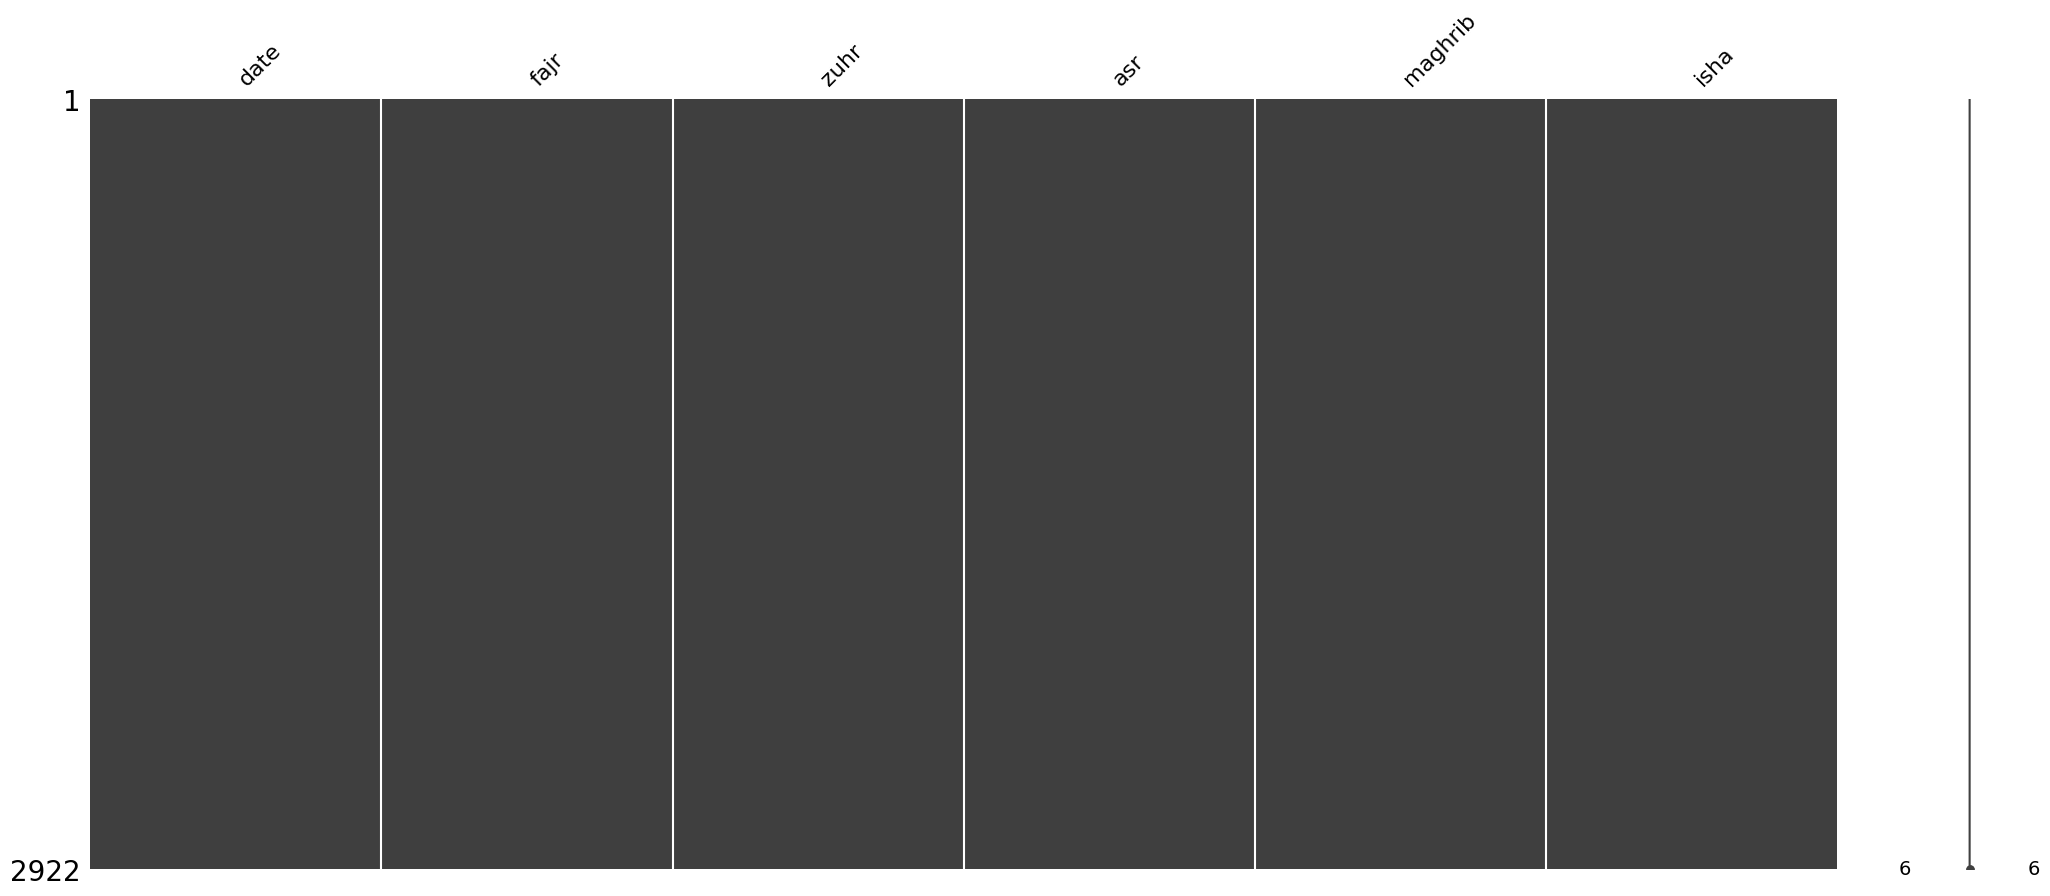

In [6]:
MissingMatrix(esolatDF)
plt.show()

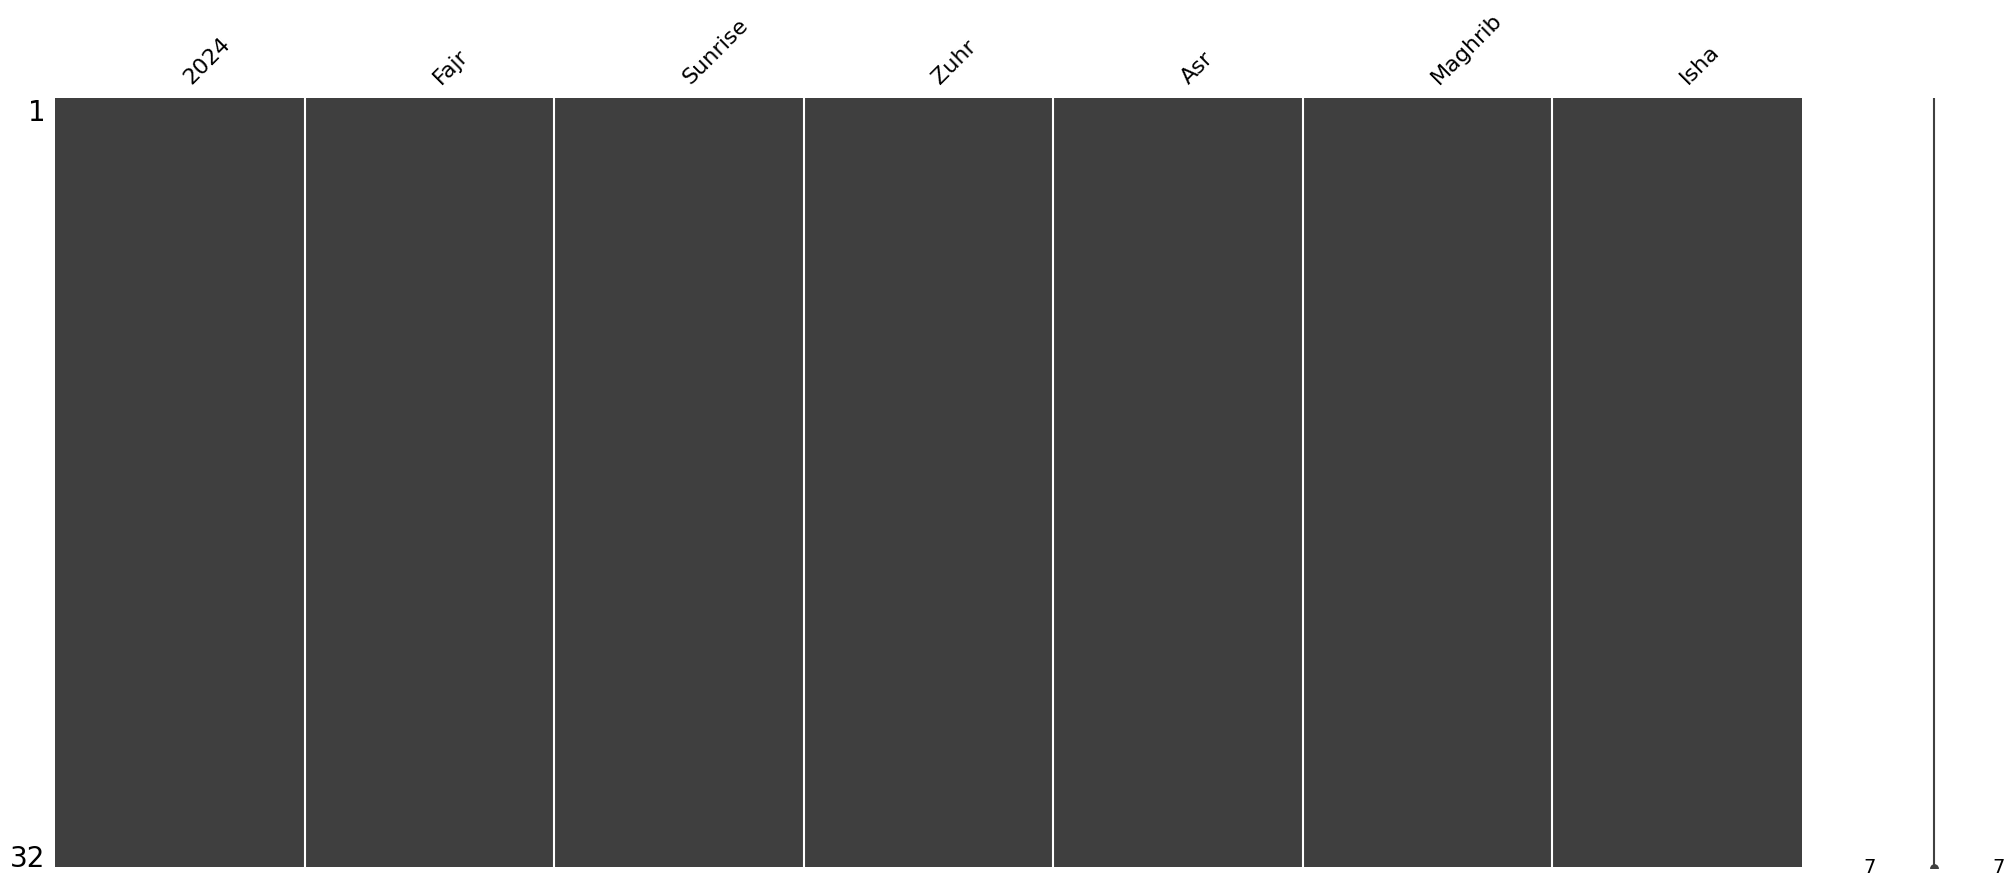

In [7]:
MissingMatrix(googleDF)
plt.show()

Validitiy

In [8]:
esolatDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2922 entries, 0 to 2921
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   date     2922 non-null   object
 1   fajr     2922 non-null   object
 2   zuhr     2922 non-null   object
 3   asr      2922 non-null   object
 4   maghrib  2922 non-null   object
 5   isha     2922 non-null   object
dtypes: object(6)
memory usage: 137.1+ KB


In [9]:
for col in esolatDF.columns:
    print(type(esolatDF[col][0]))

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


In [10]:
googleDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   2024     32 non-null     object
 1   Fajr     32 non-null     object
 2   Sunrise  32 non-null     object
 3   Zuhr     32 non-null     object
 4   Asr      32 non-null     object
 5   Maghrib  32 non-null     object
 6   Isha     32 non-null     object
dtypes: object(7)
memory usage: 1.9+ KB


In [11]:
for col in googleDF.columns:
    print(type(googleDF[col][0]))

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


In [12]:
esolatDate = pd.to_datetime(esolatDF["date"]).dt.date
esolatFajr = pd.to_datetime(esolatDF["fajr"], format="%H:%M:%S").dt.time
esolatZuhr = pd.to_datetime(esolatDF["zuhr"], format="%H:%M:%S").dt.time
esolatAsr = pd.to_datetime(esolatDF["asr"], format="%H:%M:%S").dt.time
esolatMaghrib = pd.to_datetime(esolatDF["maghrib"], format="%H:%M:%S").dt.time
esolatIsha = pd.to_datetime(esolatDF["isha"], format="%H:%M:%S").dt.time

copiedEsolatDF = \
    pd.DataFrame(
        [esolatDate,esolatFajr,esolatZuhr,esolatAsr,esolatMaghrib,esolatIsha]
    ).transpose()

print(copiedEsolatDF.head())
print(copiedEsolatDF.tail())

         date      fajr      zuhr       asr   maghrib      isha
0  2018-01-01  05:58:00  13:19:00  16:42:00  19:16:00  20:30:00
1  2018-01-02  05:58:00  13:20:00  16:42:00  19:16:00  20:31:00
2  2018-01-03  05:59:00  13:20:00  16:43:00  19:17:00  20:31:00
3  2018-01-04  05:59:00  13:21:00  16:43:00  19:17:00  20:32:00
4  2018-01-05  06:00:00  13:21:00  16:44:00  19:18:00  20:32:00
            date      fajr      zuhr       asr   maghrib      isha
2917  2025-12-27  06:04:00  13:17:00  16:40:00  19:14:00  20:29:00
2918  2025-12-28  06:04:00  13:18:00  16:40:00  19:15:00  20:29:00
2919  2025-12-29  06:05:00  13:18:00  16:41:00  19:15:00  20:30:00
2920  2025-12-30  06:05:00  13:19:00  16:41:00  19:16:00  20:30:00
2921  2025-12-31  06:06:00  13:19:00  16:42:00  19:16:00  20:31:00


In [13]:
googleDate = pd.to_datetime(googleDF["2024"].astype(str) + " 2024", format="%d %b %Y").dt.date
googleFajr = pd.to_datetime(googleDF["Fajr"], format="%H:%M").dt.time
googleZuhr = pd.to_datetime(googleDF["Zuhr"], format="%H:%M").dt.time
googleAsr = pd.to_datetime(googleDF["Asr"], format="%H:%M").dt.time
googleMaghrib = pd.to_datetime(googleDF["Maghrib"], format="%H:%M").dt.time
googleIsha = pd.to_datetime(googleDF["Isha"], format="%H:%M").dt.time

copiedGoogleDF = \
    pd.DataFrame(
        [googleDate,googleFajr,googleZuhr,googleAsr,googleMaghrib,googleIsha]
    ).transpose()

print(copiedGoogleDF.head())
print(copiedGoogleDF.tail())

         2024      Fajr      Zuhr       Asr   Maghrib      Isha
0  2024-11-30  05:52:00  13:03:00  16:27:00  19:02:00  20:16:00
1  2024-12-01  05:52:00  13:03:00  16:27:00  19:02:00  20:16:00
2  2024-12-02  05:52:00  13:04:00  16:28:00  19:02:00  20:17:00
3  2024-12-03  05:53:00  13:04:00  16:28:00  19:03:00  20:17:00
4  2024-12-04  05:53:00  13:04:00  16:29:00  19:03:00  20:17:00
          2024      Fajr      Zuhr       Asr   Maghrib      Isha
27  2024-12-27  06:03:00  13:15:00  16:39:00  19:14:00  20:29:00
28  2024-12-28  06:04:00  13:16:00  16:40:00  19:14:00  20:29:00
29  2024-12-29  06:04:00  13:16:00  16:40:00  19:15:00  20:30:00
30  2024-12-30  06:05:00  13:17:00  16:41:00  19:15:00  20:30:00
31  2024-12-31  06:05:00  13:17:00  16:41:00  19:16:00  20:30:00


<h2>Data Transformation</h2>

Transform timestamp to total minutes

In [14]:
from math import floor

In [15]:
def transformTimeToTotalMins(col_df = []):
    col = []

    if (len(col_df) > 0):
        for i in range(len(col_df)):
            t = col_df[i]
            col.append(t.hour * 60 + t.minute)
        
    return col

def transformTotalMinsToTime(col_df = []):
    col = []
    
    if (len(col_df) > 0):
        for i in range(len(col_df)):
            m = col_df[i]
            t = (str(floor(m / 60)) + ":" + str(m % 60))
            col.append(pd.Timestamp(t).time())
    return col

In [16]:
copiedEsolatDF2 = copiedEsolatDF.copy()

copiedEsolatDF2["fajr"] = transformTimeToTotalMins(copiedEsolatDF2["fajr"])
copiedEsolatDF2["zuhr"] = transformTimeToTotalMins(copiedEsolatDF2["zuhr"])
copiedEsolatDF2["asr"] = transformTimeToTotalMins(copiedEsolatDF2["asr"])
copiedEsolatDF2["maghrib"] = transformTimeToTotalMins(copiedEsolatDF2["maghrib"])
copiedEsolatDF2["isha"] = transformTimeToTotalMins(copiedEsolatDF2["isha"])

print(copiedEsolatDF2.head())
print(copiedEsolatDF2.tail())

         date  fajr  zuhr   asr  maghrib  isha
0  2018-01-01   358   799  1002     1156  1230
1  2018-01-02   358   800  1002     1156  1231
2  2018-01-03   359   800  1003     1157  1231
3  2018-01-04   359   801  1003     1157  1232
4  2018-01-05   360   801  1004     1158  1232
            date  fajr  zuhr   asr  maghrib  isha
2917  2025-12-27   364   797  1000     1154  1229
2918  2025-12-28   364   798  1000     1155  1229
2919  2025-12-29   365   798  1001     1155  1230
2920  2025-12-30   365   799  1001     1156  1230
2921  2025-12-31   366   799  1002     1156  1231


In [17]:
copiedGoogleDF2 = copiedGoogleDF.copy()

copiedGoogleDF2["Fajr"] = transformTimeToTotalMins(copiedGoogleDF2["Fajr"])
copiedGoogleDF2["Zuhr"] = transformTimeToTotalMins(copiedGoogleDF2["Zuhr"])
copiedGoogleDF2["Asr"] = transformTimeToTotalMins(copiedGoogleDF2["Asr"])
copiedGoogleDF2["Maghrib"] = transformTimeToTotalMins(copiedGoogleDF2["Maghrib"])
copiedGoogleDF2["Isha"] = transformTimeToTotalMins(copiedGoogleDF2["Isha"])

print(copiedGoogleDF2.head())
print(copiedGoogleDF2.tail())

         2024  Fajr  Zuhr  Asr  Maghrib  Isha
0  2024-11-30   352   783  987     1142  1216
1  2024-12-01   352   783  987     1142  1216
2  2024-12-02   352   784  988     1142  1217
3  2024-12-03   353   784  988     1143  1217
4  2024-12-04   353   784  989     1143  1217
          2024  Fajr  Zuhr   Asr  Maghrib  Isha
27  2024-12-27   363   795   999     1154  1229
28  2024-12-28   364   796  1000     1154  1229
29  2024-12-29   364   796  1000     1155  1230
30  2024-12-30   365   797  1001     1155  1230
31  2024-12-31   365   797  1001     1156  1230


<h2>Data Warehouse</h2>

In [18]:
df1 = copiedEsolatDF[["date"]].copy()

In [19]:
df1

,date
0,2018-01-01
1,2018-01-02
2,2018-01-03
3,2018-01-04
4,2018-01-05
...,...
2917,2025-12-27
2918,2025-12-28
2919,2025-12-29
2920,2025-12-30


In [20]:
copiedEsolatDF2.convert_dtypes()
copiedGoogleDF2.convert_dtypes()

df2 = copiedEsolatDF2.merge(
    right=copiedGoogleDF2,
    left_on="date",
    right_on="2024",
    how="left",
    indicator=True
)

df2 = df2[
    ["date","fajr","zuhr","asr","maghrib","isha","Fajr","Zuhr","Asr","Maghrib","Isha"]
]

new_col_name = {
    "fajr": "esolat_fajr",
    "zuhr": "esolat_zuhr",
    "asr": "esolat_asr",
    "maghrib": "esolat_maghrib",
    "isha": "esolat_isha",
    "Fajr": "google_fajr",
    "Zuhr": "google_zuhr",
    "Asr": "google_asr",
    "Maghrib": "google_maghrib",
    "Isha": "google_isha"
}

df2.rename(columns=new_col_name, inplace=True)

df2 = df2.fillna(0)
df2["google_fajr"] = df2["google_fajr"].astype(int)
df2["google_zuhr"] = df2["google_zuhr"].astype(int)
df2["google_asr"] = df2["google_asr"].astype(int)
df2["google_maghrib"] = df2["google_maghrib"].astype(int)
df2["google_isha"] = df2["google_isha"].astype(int)

In [21]:
df2.loc[2523:2558,"google_fajr"]

2523      0
2524      0
2525    352
2526    352
2527    352
2528    353
2529    353
2530    353
2531    354
2532    354
2533    355
2534    355
2535    355
2536    356
2537    356
2538    357
2539    357
2540    358
2541    358
2542    358
2543    359
2544    359
2545    360
2546    360
2547    361
2548    361
2549    362
2550    362
2551    363
2552    363
2553    364
2554    364
2555    365
2556    365
2557      0
2558      0
Name: google_fajr, dtype: int32

In [22]:
df1.to_csv("DW_time_stamp.csv", index=True)
df2.to_csv("DW_prayer_times.csv", index=True)